In [16]:
from visualize.data import *
from visualize.drawing import *
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import euclidean_distances

## Testing whether MDS implementation is correct: 

* generate some random samples
* calculate Euclidean distances between them
* reconstruct the positions

In [2]:
# seed = np.random.RandomState(seed=3)
# n_samples = 10
# X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)
# X_true = X_true.reshape((n_samples, 2))
# D = euclidean_distances(X_true)

# X = MDS(D)

# print(X)

# plot = visualize_img.scatter_plot(X, 'testing')
# plot = scatter_img(X, readImgList(), 'out.png')

[[ 1.53740067  2.82240294]
 [ 4.5582354   4.79081964]
 [-9.49349382 -0.0617803 ]
 [-1.74734732 -2.29721264]
 [ 0.35451664  0.06544713]
 [ 7.17877795 -9.39123197]
 [-0.04278552 -8.46927555]
 [-4.50116532  6.50148964]
 [ 9.67787505  1.50620112]
 [-7.52201373  4.53313998]]


## Testing on CURET-VisiProg data
* Create pairwise matrix
* Remove rows with all zeros entry
* Convert to similarity matrix:
  * Identical:         0
  * Highest labeling:  1
  * etc
  * Not in same group: 100 (a large value)
  
  
An example of the transformation is shown below:

Original pairwise matrix
[[ 1.  1.  0.  0.]
 [ 1.  2.  1.  0.]
 [ 0.  1.  1.  0.]
 [ 0.  0.  0.  0.]]
Method A
[[  0.   1.  10.]
 [  1.   0.   1.]
 [ 10.   1.   0.]]


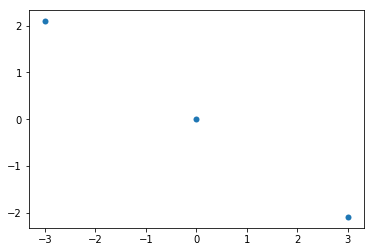

In [20]:
S = count_matrix([[0,1],[1,2]], 4)

print("Original pairwise matrix")
print(S)

print("Method A")
D, nonZeroIndex = similarity_to_distance(S, missing_value=10)
print(D)

X = MDS(D)

scatter_plot(X, "testing")

In [4]:
groups, N = readVSPLabel()
S = count_matrix(groups, N)
listImg = readImgList()

X, nonZeroIndex = spectral_clustering(S)

Adjacent
[[ 0.          0.14285714  0.14285714 ...,  0.          0.          0.        ]
 [ 0.14285714  0.          0.14285714 ...,  0.          0.          0.        ]
 [ 0.14285714  0.14285714  0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.14285714]
 [ 0.          0.          0.         ...,  0.          0.14285714  0.        ]]
Laplacian
[[ 1.14285714 -0.14285714 -0.14285714 ...,  0.          0.          0.        ]
 [-0.14285714  1.14285714 -0.14285714 ...,  0.          0.          0.        ]
 [-0.14285714 -0.14285714  1.14285714 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  1.14285714  0.          0.        ]
 [ 0.          0.          0.         ...,  0.          2.28571429
  -0.14285714]
 [ 0.          0.          0.         ...,  0.         -0.14285714
   1.14285714]]


In [9]:
print(X.shape)

spec_X = X[:,:2]
print(spec_X.shape)
print(len(nonZeroIndex))

print(X)

np.savetxt('spec.csv', X, delimiter=",")

(3224, 10)
(3224, 2)
3224
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [6]:
nonZeroList = [listImg[t] for t in nonZeroIndex]
scatter_img(spec_X, nonZeroList, 'spec.png')

/Users/andrey/anaconda/envs/beyourself/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/Users/andrey/anaconda/envs/beyourself/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: spec.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/andrey/anaconda/envs/beyourself/lib/python3.6/site-packages/skimage/util/dtype.py:118: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/Users/andrey/anaconda/envs/beyourself/lib/python3.6/site-packages/skimage/util/dtype.py:171: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


In [13]:
groups, N = readVSPLabel()
S = count_matrix(groups, N)
D, nonZeroIndex = similarity_to_distance(S, missing_value=100)

X = MDS(D)

In [15]:
imgList = readImgList()
nonZeroList = [imgList[p] for p in nonZeroIndex]
scatter_img(X, nonZeroList, 'MDS.png')

/Users/andrey/anaconda/envs/beyourself/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/Users/andrey/anaconda/envs/beyourself/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: MDS.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/andrey/anaconda/envs/beyourself/lib/python3.6/site-packages/skimage/util/dtype.py:118: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/Users/andrey/anaconda/envs/beyourself/lib/python3.6/site-packages/skimage/util/dtype.py:171: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


In [8]:
# groups, N = distance.readVSPLabel()
# S = distance.count_matrix(groups, N)
# D, nonZeroIndex = distance.similarity_to_distance(S, missing_value=0)

# plot = distance.SMACOF(D)

NameError: name 'distance' is not defined

In [ ]:
# print(plot.shape)
# plot = plot[:-1]
# listImg = distance.readImgList()
# print(len(listImg))

# visualize_img.scatter_img(plot, distance.readImgList(), 'smacof.png')

## Why MDS do not work?

MDS is highly sensitive to all entries of the S matrix. It requires that all of the entries make sense, and follow the metric axioms.

In VSP case, lots of entries of the matrix has the same value (100). This forces MDS to learn the circle representation.

In other words, the simple model of setting pair not belongs to a group to be a large number does not work.